# DISASTER CLASSIFYING WITH NLP (SVM)

In [120]:
! pip install wordcloud

You should consider upgrading via the 'c:\python 3.8\python.exe -m pip install --upgrade pip' command.


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [122]:
df = pd.read_csv("dataset/train.csv")

In [123]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [124]:
df = df.drop("location", axis=1)
df = df.drop("id", axis=1)

In [125]:
df.head()

,keyword,text,target
0,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1


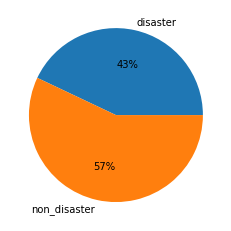

In [126]:
# visualization of both fake and real tweets in the dataframe
data = df.groupby("target")["text"]
disaster = data.get_group(1).count()
non_disaster = df.shape[0] - disaster
data = [disaster, non_disaster]
labels = ["disaster", "non_disaster"]
plt.pie(data, labels = labels, autopct='%0.0f%%')
plt.show()

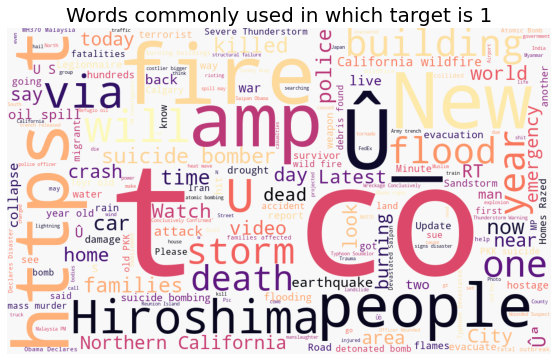

In [127]:
# word cloud for both target 1 and 0
plt.figure(figsize = (10, 6))
wc = WordCloud(width = 1000, height = 600, background_color="#f8f8f8", colormap = 'magma')
text = df[df["target"] == 1]["text"]
text = text.str.cat(sep= ' ')
wc.generate_from_text(text)
plt.imshow(wc)
plt.axis("off")
plt.title("Words commonly used in which target is 1", size = 20)
plt.show()

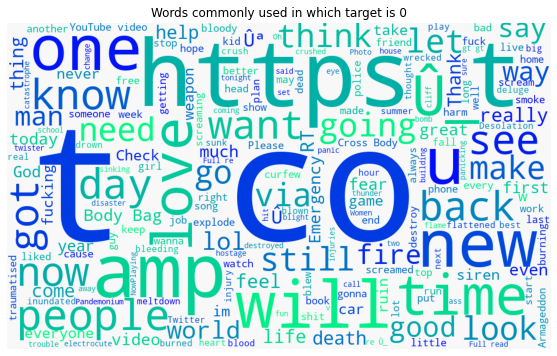

In [128]:
plt.figure(figsize=(10, 6))
wc = WordCloud(width = 1000, height = 600, background_color = "#f8f8f8", colormap="winter")
text = df[df["target"] == 0]["text"]
text = text.str.cat(sep = " ")
wc.generate_from_text(text)
plt.imshow(wc)
plt.axis("off")
plt.title("Words commonly used in which target is 0")
plt.show()

## TEXT CLEANING AND PREPROCESSING

In [129]:
oldkeywords = df["keyword"].unique()[1:]

In [130]:
keywords = df["keyword"].unique()[1:]
for i,word in enumerate(keywords):
    word = re.sub("%20", "", word)
    keywords[i] = word

In [131]:
df["keyword"] = df["keyword"].replace(oldkeywords, keywords)

In [132]:
df["keyword"].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplaneaccident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blewup', 'blight', 'blizzard', 'blood',
       'bloody', 'blownup', 'bodybag', 'bodybagging', 'bodybags', 'bomb',
       'bombed', 'bombing', 'bridgecollapse', 'buildingsburning',
       'buildingsonfire', 'burned', 'burning', 'burningbuildings',
       'bushfires', 'casualties', 'casualty', 'catastrophe',
       'catastrophic', 'chemicalemergency', 'clifffall', 'collapse',
       'collapsed', 'collide', 'collided', 'collision', 'crash',
       'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage',
       'danger', 'dead', 'death', 'deaths', 'debris', 'deluge', 'deluged',
       'demolish', 'demolished', 'demolition', 'derail', 'derailed',
       'derailment', 'desolate', 'desolat

## NOW WE TAKE THE VALUES IN TEXT IF ANY WORD MATCH FROM THE ABOVE THEN REPLACE IT WITH NAN VALUE

In [133]:
sentences = []
for i, sent in enumerate(df["text"]):
    sent = sent.lower()
    sent = re.sub("[^a-zA-Z]", " ", sent)
    sent = sent.split()
    sentences.append(sent)

In [134]:
for i,sentence in enumerate(sentences):
    if type(df["keyword"][i]) == float:
        for word in sentence:
            if word in keywords:
                df["keyword"][i] = word     

<ipython-input-134-2bf15892f3ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["keyword"][i] = word


In [135]:
df.dropna(inplace = True)
df.reset_index(inplace = True)

In [136]:
df.head()

,index,keyword,text,target
0,0,earthquake,Our Deeds are the Reason of this #earthquake M...,1
1,1,fire,Forest fire near La Ronge Sask. Canada,1
2,2,evacuation,All residents asked to 'shelter in place' are ...,1
3,3,evacuation,"13,000 people receive #wildfires evacuation or...",1
4,4,wildfires,Just got sent this photo from Ruby #Alaska as ...,1


In [137]:
df.drop("index", axis = True, inplace = True)

In [138]:
df["text"] = df["keyword"]+" " + df["text"]
df.drop("keyword", axis=1, inplace = True)

In [139]:
df.head()

,text,target
0,earthquake Our Deeds are the Reason of this #e...,1
1,fire Forest fire near La Ronge Sask. Canada,1
2,evacuation All residents asked to 'shelter in ...,1
3,"evacuation 13,000 people receive #wildfires ev...",1
4,wildfires Just got sent this photo from Ruby #...,1


## REMOVING STOP WORDS AND WORD STEMMING IN DONE

In [140]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [141]:
ps = PorterStemmer()

In [142]:
corpus = []
count = 0
for x in df["text"]:
    # removing the hyperlinks
    review = re.sub('http:\/\/.*'," ", x)
    review = re.sub('https:\/\/.*'," ", review)
    
    # removing the special characters and numbers
    review = re.sub('[^a-zA-Z]', " ", review)
    review = review.lower()
    
    # removing white spaces
    review = re.sub(' +', " ", review)
    
    #stemming the sentences
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words("english")]
    review = " ".join(review)
    count = count+1
    print(count, review)
    corpus.append(review)

1 earthquak deed reason earthquak may allah forgiv us
2 fire forest fire near la rong sask canada
3 evacu resid ask shelter place notifi offic evacu shelter place order expect
4 evacu peopl receiv wildfir evacu order california
5 wildfir got sent photo rubi alaska smoke wildfir pour school
6 wildfir rockyfir updat california hwi close direct due lake counti fire cafir wildfir
7 flood flood disast heavi rain caus flash flood street manit colorado spring area
8 fire top hill see fire wood
9 evacu emerg evacu happen build across street
10 tornado afraid tornado come area
11 flood haha south tampa get flood hah wait second live south tampa gonna gonna fvck flood
12 flood rain flood florida tampabay tampa day lost count
13 flood flood bago myanmar arriv bago
14 crash damag school bu multi car crash break
15 ablaz bbcmtd wholesal market ablaz
16 ablaz alway tri bring heavi metal rt
17 ablaz africanbaz break news nigeria flag set ablaz aba
18 ablaz cri set ablaz
19 ablaz plu side look sky las

135 airplaneaccid expert franc begin examin airplan debri found reunion island french air accid expert
136 airplaneaccid unbeliev insan man airport airplan aircraft aeroplan runway accid freaki
137 airplaneaccid horribl accid man die wing airplan
138 airplaneaccid horribl accid man die wing airplan
139 airplaneaccid usama bin ladin famili dead airplan crash natur accid
140 airplaneaccid pilot die plane crash car festiv
141 airplaneaccid strict liabil context airplan accid
142 airplaneaccid dtn brazil expert franc begin examin airplan debri found reunion island french air accid exp
143 airplaneaccid expert franc begin examin airplan debri found reunion island french air accid expert wedn
144 airplaneaccid horribl accid man die wing airplan wtf believ eye
145 airplaneaccid nicol fletcher one victim crash airplan time ago accid left littl bit trauma although
146 airplaneaccid omg horribl accid man die wing airplan
147 airplaneaccid omg believ rip bro airplan accid jetengin turbojet bo g
1

262 apocalyps honeybunzgem primalkitchen feel like pull one stage apocalyps
263 apocalyps kinda hot play radio today next diseas apocalyps start everyon care
264 apocalyps apocalyps lol gf
265 apocalyps know question interpret sign apocalyps call
266 apocalyps juli r apocalyps version romeo juliet warmbodi
267 apocalyps apocalyps upon us
268 apocalyps rt fittscott minecraft night lucki block mod bob apocalyps wither amp mod showcas popularmmo
269 apocalyps begin day one snow apocalyps
270 apocalyps rt mother mari short read apocalyps spirit angel took top enorm high mountain
271 apocalyps candylit imagin sarumi zombi apocalyps fight back back heart heart convers
272 apocalyps rt zonewolf like youtub video
273 apocalyps planet lone audienc apocalyps
274 apocalyps dad bought dvd look like scienc doc front read back actual impend biblic apocalyps
275 apocalyps alexandrapullin inde apocalyps come week know
276 apocalyps go look grizzli peak right look like begin dystopian apocalyps movi
27

401 arsonist arson suspect link fire caught northern california
402 arsonist local arsonist diamorfiend legal system never forget
403 arsonist casper rmg u dick
404 arsonist bloor ossington arsonist also burn mattress northumberland st cbcto
405 arsonist arsonist
406 arsonist anyth nice say come sit
407 arsonist vegetarian vegan video show arsonist torch popular bk restaur strictli vegetarian
408 arsonist arsonist arrest set mani fire watch tonight headlin
409 arsonist video captur man remov american flag long beach ca home burn arsonist sought
410 arsonist hif trick think nasti thing
411 arsonist spotlight take paradis arsonist mc wniagospel
412 arsonist make
413 arsonist town salem melt ice cube bc im arsonist
414 arsonist arsonist blame blaze plastic recycl busi adelaid pcaldicott report newsadl
415 arsonist hotboy shit
416 arsonist zodiac girl feat trey dupre produc sparkz beatz chuck da arsonist
417 arsonist local arsonist lmfao
418 arsonist alleg east bay serial arsonist arrest s

535 battl ya boy clip vs ku full battl moferadio heavybag battl dom qotr battlerapchri hugh
536 battl inde fulli awar battl support fight
537 battl baaaack petersen bowhunt battl bow make sure head cast vote
538 battl tb throwback want battl war
539 battl kelbi tomlinson mild manner nd baseman great metropolitan team fight never end battl hit rbi sfgiant way
540 battl black eye space battl occur star involv fleet total ship destroy
541 battl realli happen taken king stori trailer space battl rip hole saturn eytay neur si
542 battl battl anim fuck much
543 battl see happen battl block cbsbigbroth final
544 battl du gon get rap battl
545 battl thing battl intern vs extern motiv
546 battl check item got phantasm cummerbund
547 battl young german stormtroop engag battl somm
548 battl like youtub video
549 battl utahcanari sigh daili battl
550 battl sexydragonmag come realiz attent span mass battl game paint play
551 battl detroitpl interest see win battl
552 battl battl goat
553 battl star

651 blaze djjohnblaz shout blaze hottest dj sothwest
652 blaze like youtub video
653 blaze properti loss california wildfir nearli doubl week old blaze rage fire
654 blaze christycroley work yet see new vela short blaze
655 blaze uabstephenlong courtlizcamp total tweet fail beauti insid blaze
656 blaze mixtap come promis goin right
657 blaze itzsteven xdojjjj whopper jr huh leo start last year ever sinc peopl blaze back
658 blaze bedroom bath sale palm ca youtub video
659 blaze ye gun
660 blaze cee daem girl smooth asf c
661 blaze
662 blaze bright amp blaze fireman birthday parti
663 blaze real vibez radio blaze best vibez
664 blaze montgomeri come blaze hot weather stay std yet anoth reject citi slogan
665 blaze come join us tomorrow august transcend blaze trail diversifi world market
666 blaze morgan silver dollar gem bu dmpl cameo rev blaze ms high grade full read
667 blaze morgan silver dollar gem bu dmpl cameo rev blaze ms high grade full read
668 blaze bowl got think damn blaze d

797 blizzard amazon deal wait buy
798 blizzard new print avail
799 blizzard blizzard draco give free art kamon
800 blizzard stevenontwatt pussyxdestroy order blizzard pay put nut say ball flavor boom free ice cream
801 blizzard blizzard auz pm cst radioriffrock
802 blizzard realli want rolo blizzard mom said guess dq tonight
803 blizzard ashayo msmiggi hi ashayo believ vod youtub present noth like see live
804 blizzard stat
805 blizzard tweet taiji dolphin worship group base superstit take look tweet
806 blizzard blizzard fan lucio let get overwatch hype train roll caution though break
807 blizzard blizzard gamin ight
808 blizzard peanut butter cooki dough blizzard
809 blizzard mic control work one second
810 blizzard tomorrow announc vod
811 blizzard updat window get error
812 blizzard new expans idea bard class holi triniti
813 blizzard daborsch realli shock blizzard lure old fanbas back wod disappoint us hardcor everyon leav
814 blizzard best thing dq cotton candi blizzard
815 blizz

934 blownup thebriankraus leo ass got metaphor blown piperwearsthep charm
935 blownup anarch teapot boironusa zeno glononium c also help blown bash bottl nitroglycerin book
936 bodybag new ladi shoulder tote handbag women cross bodi bag faux leather fashion purs full
937 bodybag new ladi shoulder tote handbag women cross bodi bag faux leather fashion purs full
938 bodybag son daughter would like see go war iran come back bodi bag let republican know
939 bodybag questergirl ditto way feel drank vodka ice would bodi bag
940 bodybag handbag genuin mulberri antoni cross bodi messeng bag dark oak soft buffalo leather end date w
941 bodybag loui vuitton monogram sophi limit edit clutch cross bodi bag full read ebay
942 bodybag loui vuitton monogram sophi limit edit clutch cross bodi bag full read ebay
943 bodybag loui vuitton cultsierr monogram shoulder bag cross bodi bag
944 bodybag check ameribag healthi back bag shoulder cross bodi backpack khaki tan beig nylon
945 bodybag photo bath amp 

1052 bomb cranboonitz go make bomb threat hereticofeth
1053 bomb dylanmcclur work zumiez
1054 bomb new document found point japan wwii atom bomb program
1055 bomb jen da bomb girl
1056 bomb daniglasgow happi birthday big miss girl hope bomb one
1057 bomb smallforestelf umm gun stop gunman carri bomb
1058 bomb danielsahyouni bomb u guy
1059 bomb new document found point japan wwii atom bomb program
1060 bomb hiroshima mark year sinc bomb
1061 bomb crew enolagay nuclear bomb board disarm min hiroshima got readi arm littl boy
1062 bomb dopeitsv ahh bomb babi
1063 bomb get bomb ass pictur mail
1064 bomb fall men god praiz bomb well av alway known dat sinc bigger u pray sir
1065 bomb came idea fragranc concept bath bomb call blood enemi say bath
1066 bomb carajdeievingnc bomb impact ratio hit beyond kyle js
1067 bomb swellyjetevo disneyland taco bomb
1068 bomb flat bomb flavafraz whatcanthedo
1069 bomb would look like hiroshima bomb hit detroit thursday mark year anniversari unit
1070 bomb 

1173 bridgecollaps two crane restor bridg central dutch town alphen aan den rijn collaps build rescuer search
1174 bridgecollaps leicest merc icymi ash australia collaps trent bridg twitter rea
1175 bridgecollaps two giant crane hold bridg collaps nearbi home
1176 bridgecollaps us wont upgrad infrastructur
1177 bridgecollaps marshal plan unit state dambisa moyo via prosyn ope
1178 bridgecollaps ameenshaikh sir want make point sureshpprabhu made said lie bridg collaps
1179 buildingsburn sonofliberti illumin brightli burn build around town
1180 buildingsburn gemini children scream build burn polic siren distanc
1181 buildingsburn mmmmmm burn burn build build oooooohhhh oooh ooh
1182 buildingsburn dougmartin fireman ed run burn build other run doug deserv respect
1183 buildingsburn themagickidrap upset ralli upset burn build busi execut cop noth etc
1184 buildingsburn kou like cash regist build burn
1185 buildingsburn minimehh cjoyner must overlook burn build blacklivesmatt
1186 buildings

1287 burn bulletproof black like funer world around us burn cold
1288 burn stacdemon five burn question chri mullin st john
1289 burn johnsontionn except idk realli burn
1290 burn leader zionism stop burn babi
1291 burn kanger coil burn fast via r vape
1292 burn rt huffpostcomedi build wall keep burn man attende come home
1293 burn flame visibl fire tucson mountain lightn caus fire burn steep rocki terrain mountain
1294 burn burn like neon light
1295 burn modest certainli sniff sniiiiiiff er donni someth burn
1296 burn burn legion return
1297 burn bar method integr fat burn format interv train muscl shape techniqu
1298 burn bore life get everi morn burn desir thing enough goal lou holtz
1299 burn hand burn
1300 burn uhhhhh demon hunter whole burn crusad v thing
1301 burn play boat club memori london burn web radio
1302 burn nagel ashley vicken basedlarock goonc ty rip world burn
1303 burn rubi mani stack burn appli
1304 burn parent take kid burn man one year old think better
1305 burn 

1402 casualti road power pave hypocrisi casualti francisunderwood hoc
1403 casualti revis death america scenario american casualti iranian activ suspect
1404 casualti afghanistan sharp rise women children casualti first half
1405 casualti stay tune idc casualti
1406 casualti civilian casualti afghanistan hit highest number sinc u n say via washingtonpost
1407 casualti warfight robot could reduc civilian casualti call ban prematur
1408 casualti irishspi think alli suck million casualti
1409 casualti afghanistan sharp rise women children casualti first half
1410 casualti whimsi pertain mass casualti alway impress
1411 casualti train derail patna news casualti far
1412 casualti hire toronto branch sureti underwrit senior underwrit casualti product leader appli today
1413 casualti abl stay work week take onlin cours properti casualti state
1414 casualti properti casualti insur rate juli sever month movement commerci properti casu
1415 casualti new wave casualti aid tweet sinc grown watch d

1516 chemicalemerg david cameron stop upset bee listen scienc chemic compani savebe
1517 chemicalemerg krefeld incid happen chemic industri park emerg oper underway build reportli collaps cnnbrk ntvde
1518 chemicalemerg chemic brother play armori sf tomorrow night emerg bay area edm announc chem
1519 chemicalemerg sign petit david cameron protect bee instead toxic chemic compani want harm savebe
1520 chemicalemerg usa break news chemic spill evacu red cross emerg
1521 chemicalemerg new job open downtown emerg servic center seattl chemic depend counselor intern job
1522 chemicalemerg emerg crew respond chemic spill downtown beaumont benew
1523 chemicalemerg explos chemic site lead build collaps near krefeld germani emerg crew scene avoid area ijetalert
1524 chemicalemerg bomb crash loot riot emerg pipe bomb nuclear chemic spill ga ricin leak violenc drug cartel cocain marijuana heroin kidnap bust
1525 chemicalemerg googl alert emerg unit simul chemic explos nu
1526 chemicalemerg downtow

1632 collaps petit heartless owner whip hors collaps told keep anim act
1633 collaps nd year offic team run club collaps influenti member betray everyon trust sever commun
1634 collaps petit heartless owner whip hors collaps told keep anim act
1635 collaps portabl closet collaps x final broke mom said mayb u get rid cloth lol
1636 collaps rokiiee game offici collaps
1637 collaps great british bake back dorret chocol gateau collaps jan moir
1638 collaps still mortifi went rose collaps heel face plant front everyon broke fav shoe
1639 collaps collaps greek peopl still play fool tsipra cost wallybait
1640 collaps quora answer answer get collaps other
1641 collaps almost collaps bc said wish came true moder fuck
1642 collaps collaps moment got home last night lol
1643 collaps flickershowel oh wow heart collaps cool im cri cool cool
1644 collaps look collaps attempt munch endang speci
1645 collaps appar part build collaps hope everyon ok
1646 collaps xdescri wrong call trusti actual consid 

1752 collis pm mapleridg loughe hwi eb close rd dewdney trunk rd collis eto pm pm
1753 collis head head collis ima problem nobodi solv em long divis
1754 collis solano sr skagg island rd trfc collis enrt
1755 collis traffic collis injuri rd ave offramp south sac
1756 collis clear collis qew fort eri bound approach hwi niagara vehicl remov ag
1757 collis motorcyclist bicyclist injur denver collis broadway
1758 collis motorcyclist bicyclist injur denver collis broadway
1759 collis south sac rd ave ofr trfc collis inj
1760 collis anti collis rear gadget technolog
1761 collis sometim space celesti bodi separ trajectori intertwin find danc rather collis cours
1762 crash next financi crash write wall say warn
1763 crash feel crash burn thoma rhett sure
1764 crash motogp indianapoli espargaro layout worri littl
1765 crash bought anoth meinlcymb medium crash hey meinlcymb endors start get expens
1766 crash html beginn crash cours
1767 crash slam door lesson learn let anoth lover crash burn
176

1898 curfew ara news report jan fighter infiltr ashrafiyah district afrin aim carri suicid attack ypg impos curfew
1899 curfew keampurley thirst curfew
1900 curfew fact curfew
1901 curfew michelleell shut freshman past ur curfew u need sleep u spend much ur time watch tv instead go outsid
1902 curfew night curfew campu find
1903 curfew polic teenag arrest curfew violat evanston ride stolen bicycl two teenag taken cu chicago news
1904 curfew reason im listen curfew overtim stuck kodak
1905 curfew bobbyxfish gave curfew
1906 curfew curfew realli help think bc
1907 curfew exofficio men boxer brief curfew larg
1908 curfew info wnd cld sct bkn exp inst apch rwi curfew oper z taxiway foxtrot amp foxtrot navbl tmp
1909 curfew emaaalay thank citi wide curfew
1910 curfew said curfew nope
1911 curfew curfew start right privat class end tutor must woman prefer someon
1912 curfew aptli engineerd curfew
1913 curfew past curfew grove
1914 curfew emmychappi clock mom said everyon go home curfew
1915 

2024 danger bluebirddenv fettilootch slanglucci oppress greatest danger come soon album
2025 danger uber look repair recent bad rap nonprofit partnership
2026 danger wish could get victoria secret front good
2027 danger turnedonfetaboo hsjb check rockin preview claytonbry danger zone come soon
2028 danger thetxi gunnersfan would arsen fan want west ham releg battl season danger afc sun
2029 danger remainontop fettilootch slanglucci oppress greatest danger come soon album
2030 danger nugget fettilootch slanglucci oppress greatest danger come soon album
2031 danger danger excit underwat cave dive
2032 danger girl wanna save like danger health tri somebodi wanna somebodi els
2033 danger gun protect shit realli use unless life danger
2034 danger thirsti yall danger dehydr
2035 danger thunderstorm littl rain expect central california high fire danger weather cawx
2036 danger wanna get danger day tattoo bad cool would spider look like someon wrist smth
2037 danger experi alway angri critic p

2152 debri mh aircraft debri found la reunion miss malaysia airlin
2153 debri malaysia confirm plane debri wash reunion island flight mh
2154 debri mh aircraft debri found la reunion miss malaysia airlin
2155 debri miss jet debri could float r union new york time
2156 debri r union debri almost sure flight offici say new york time
2157 debri r union debri almost sure flight offici say new york time
2158 debri debri found reunion island flight mh mysteri behind plane disappear could better novel
2159 debri mh aircraft debri found la reunion miss malaysia airlin
2160 debri reuter debri confirm mh rel hope discoveri crash site
2161 debri nbcnightlynew malaysian offici say debri found reunion island mh billneelynbc report
2162 debri mh debri found reunion island sad tragedi innoc crash mh
2163 debri love food fun malaysian prime minist najib razak confirm aircraft debri found r union isla
2164 debri malaysia seem certain franc plane debri miss mh
2165 debri malaysian offici say debri found

2268 demolish set goal amp demolish
2269 demolish rt abbswinston zionist terrorist demolish palestinian structur jordan valley
2270 demolish mariomaraczi watch right freak st first fight demolish guy
2271 demolish think akwa ibom come uruan demolish build ex assembl member warn udom emmanuel
2272 demolish read alreadi remain one favorit articl ever let like demolish laundri
2273 demolish imagin kp root demolish everyon
2274 demolish absurdli ridicul men fashion demolish manhood
2275 demolish far right racist avigdorliberman call destruct susiya previous also call behead
2276 demolish could demolish right
2277 demolish postal servic agre sell demolish downtown build
2278 demolish news updat enugu govern demolish illeg structur intern confer centr
2279 demolish complet quest demolish murlo android game tribez
2280 demolish jolli jinu said terrorist babri ok demolish hous todayhav right take reveng
2281 demolish think becom businessman demolish commun centr build condo foil troup multi ra

2385 derail ohmygoshi unsuckdcmetro point expect hear report metrobu derail
2386 derail happi one hurt wmata train derail also express bu much better metro rail
2387 derail adani amp modi plan mine derail australia court block huge india back coal mine
2388 derail dc media tip get updat derail wmata train today ask movi night quickli chang subject
2389 derail jozerphin liter look yeah derail smithsonian everythign shut feder center sw mcpherson
2390 derail use exactli nation assembl honestli worthless derail
2391 derail trustymclusti passeng derail train morn commut fcked go home
2392 derail crocodil tear wash upset gravi train derail kidscompani
2393 derail epic insan got derail outsid grimrail depot
2394 derail updat passeng metro train derail caus terribl delay morn derail train caus hell
2395 derail sturi note passeng board train derail morn
2396 derail new illustr l time
2397 derail free name new doc newidea get back write w derail think titl w twitter
2398 derail whoa wmata train

2500 desol rt kurtkamka beauti desol coupl coyot lizard morn sun phoenix ariz
2501 desol wow free hobbit desol smaug uv digit download code gin
2502 desol watch desol smaug spanish hell drug
2503 desol josephu get wrong antiochu epiphan abomin desol read
2504 desol fear panic air want free desol despair
2505 desol free kindl book aug thriller desol run jamessnyd
2506 desol go redo nail watch behind scene desol smaug ayyy
2507 desol yeah lamb god rock ring intro desol hd
2508 desol time desol troubl daniel persist prayer fast brought forth heavenli power god
2509 desol nikostar lake ohio thought abject desol subway restaur
2510 desol caus right read good send letter unless gonna mail desol row
2511 desol realli like first hobbit movi saw three time theatr saw desol smaug came feel
2512 desol afraid sudden fear neither desol wick cometh lord shall thi
2513 desol hobbit desol smaug ed sheeran see fire hd
2514 desol beauti desol coupl coyot lizard morn sun phoenix arizona
2515 desol fotose

2621 destruct alexeivolkov mcfaul equal spirit leav roskomnadzor ridicul politic destruct illeg food
2622 destruct ultim road destruct
2623 destruct self destruct mode
2624 destruct bonn egreer angel histori propel futur wind progress leav wake pile death destruct wb
2625 destruct marquei como visto dragon ball super x god destruct dream
2626 destruct temptat alway lead destruct
2627 destruct rss russia begin mass destruct illeg import food
2628 destruct new weapon caus un imagin destruct
2629 destruct sure made impact
2630 deton tinyjecht anoth stand user deton killer queen
2631 deton bomb squad set deton backpack antioch tenn theater gunman offici say tennessean
2632 deton apollo brown ft p deton
2633 deton apollo brown deton ft p
2634 deton furiosoxv stun also probabl anyth like aw stun deton
2635 deton spinningbot anoth stand user deton killer queen
2636 deton mythgriy deton unless touch ground
2637 deton deton feat p apollo brown
2638 deton boulder deputi wait bomb squad deton gre

2752 devast thorium radioact weapon scandal murder environment devast video
2753 devast
2754 devast year atom bomb japan still struggl war past anniversari devast wrought b
2755 devast year atom bomb japan still struggl war past anniversari devast wrought b
2756 devast would citi look like subject hiroshima bomb hint devast beyondthebomb
2757 devast fascin pic insid north korea propaganda devast peopl live life
2758 devast settlement attain use illustr help juror understand true devast intern injuri
2759 devast year atom bomb japan still struggl war past anniversari devast wrought b
2760 devast health newyear anniversari devast wrought first militari use atom weapon come
2761 devast visit hiroshima incred place model show devast bomb
2762 devast devast come target find starbuck close momneedscoffe asap iwontmakeit
2763 devast water top chart highest global risk term devast ahead nuclear war global pandem
2764 devast current blast benedict sanelesstheori metal devast radio
2765 disast f

2871 drown potu drown water enter lung aliv caus great countri fall shit pussi
2872 drown karijob band kill tonight almost loud enough drown tambourin behind codycarn ag usa
2873 drown littl gecko chillin garden end help suspect might drown
2874 drown save self let drown
2875 drown carri thing insid one els see hold us like anchor drown us sea
2876 drown nowplay porcupin tree drown live listen live
2877 drown lowkey alreadi know gonna drown school year
2878 drown chromsuck drown
2879 drown throw water drown last word choke
2880 drown drown k swim
2881 drown day drown tear let get
2882 drown cameronhigdon drown demon know swim
2883 drown graysondolan u let drown
2884 drown lwilliam drown river walk
2885 drown mom annoy turn beat pill way drown
2886 drown ev make wanna drown idiot
2887 drown cortneymo put detroit nigga gone act tryna fuck n drown mf loos buff water
2888 drown jasminehuerta hope drown
2889 drown drown demon know swim
2890 drown gonna drown mustard lemon pepper
2891 drown 

3006 duststorm new mad max screenshot show love dust storm combat magnum opu
3007 duststorm deadlydemi even stay night barrier p run dust storm almost pass
3008 duststorm go fest bring swim goggl dust storm circl pit
3009 duststorm sever storm weaken move se toward lubbock area outflow boundari may creat dust mph gust
3010 duststorm new mad max screenshot show love dust storm combat magnum opu
3011 earthquak earthquak sismo km e interlaken california time utc
3012 earthquak earthquak occur near mount st helen area washington utc earthquak
3013 earthquak contruct upgrad ferri earthquak standard vashon mukilteo q fox
3014 earthquak novic renison mine see seismic event
3015 earthquak put right person block shelli sens entitl ridicul bb
3016 earthquak earthquak sicili itali iphon user download earthquak app inform
3017 earthquak usg eq km twentynin palm california time utc
3018 earthquak post new song earthquak
3019 earthquak aftershock big initi earthquak
3020 earthquak sismo ml near coas

3129 emerg stl ace grill surfac mount speedtech light amber emerg light
3130 emerg new quest type level quest alway present quest x exp design help peopl level outsid emerg quest
3131 emerg seed veget fruit varieti garden kit emerg surviv gear mre full rea
3132 emerg updat indiana state polic reopen near lafayett follow emerg bridg repair close key highway hour
3133 emerg sf asian women shelter crisi line emerg shelter support servic non english speak asian women amp children
3134 emerg emerg root canal tookitlikeaman lovemydentist sore
3135 emerg runner joy ye especi new client walk think wart emerg
3136 emerg myanmar flood childfund intern need
3137 emerg anchorag job emerg medicin nurs practition healthcar recruit counselor wasilla ak em
3138 emerg set emerg fund easi step never know surpris expens pop work
3139 emerg eye nation amp broader conserv commun alaska akgovbillwalk reinstat emerg buffer protectdenaliwolv
3140 emerg gonna call tomorrow aul emerg dental appoint excus like w

3235 engulf came land engulf tribal war turn land peac e madinah prophetmuhammad islam
3236 engulf michael engulf jumper
3237 engulf engulf low self imag take quiz
3238 engulf godsfirstson wrap coat around practic engulf
3239 engulf cake engulf flame literarycak
3240 engulf raheelsharif manifest one right man helm save sink ship engulf dark stormi tidal sea well done
3241 engulf tf decid workout today bodi feel like engulf mass fieri disdain
3242 engulf feel engulf low self imag take quiz
3243 engulf man equal incap see nothing emerg infin engulf blais pascal
3244 engulf fulli engulf garag fire propan tank insid sunnymead dr
3245 engulf came land engulf tribal war turn land peac e madinah prophetmuhammad islam
3246 engulf suelinflow word describ physic painthey rip apart scream dear lifeit like engulf
3247 engulf zachzaidman thescor wld b shame golf cart becam engulf flame boycottbear
3248 engulf car engulf flame back traffic parley summit
3249 engulf engulf low self imag take quiz
325

3361 evacu eric bulak jaclynsonn oliviaann look guy live stream guess evacu cost front
3362 evacu faan give owner abandon aircraft evacu ultimatum
3363 evacu updat rockyfir map mandatori evacu area red advisori evacu yellow evac center green
3364 evacu updat gnwt issu voluntari evacu order cabin owner pickerel lake near reid
3365 evacu evacu order lift town roosevelt wash though resid warn readi leav quickli
3366 evacu batfanuk enjoy show today great fun emerg non evacu interest great run
3367 evacu school put evacu alarm accid differ trial exam happen kid
3368 evacu walk middl michigan ave last sunday lolla evacu
3369 evacu ink entertain address veld evacu refund statu
3370 evacu voluntari evacu recommend time pickerel lake cabin across highway reidlak fire say maca nwt yzf
3371 evacu ibrahimmisau faan order evacu abandon aircraft mma
3372 evacu evacu order lift town roosevelt
3373 evacu updat bend fd natur ga line cut prompt evacu main post offic afternoon
3374 evacu new evacu order 

3483 explos bad ass mood today got elev school decid make explos nose everytim one press button
3484 explos checkout nurgl rule amp featur snuck khrone wd
3485 explos new explos proof temper glass screen protector film blackberri z full read
3486 explos invit expo explos summer event august th friday ben e keith
3487 explos gusto persist amongst empti pate commun explos hpssjd
3488 explos insid explos box get custom way want dcubecraft greetingcard
3489 explos interest gun powder art discuss end introduct theolog aesthet
3490 explos govern concern popul explos popul concern govern explos joe moor
3491 eyewit rememb pittsburgh eyewit histori steel citi len barcouski pb penn
3492 eyewit squibbi eyewit ha
3493 eyewit eyewit identif via reddit
3494 eyewit wpri eyewit news rhode island set modern vote equip wpri eyewit
3495 eyewit eyewit account survivor hiroshima glean number oral histori project
3496 eyewit dutch crane collaps demolish hous dramat eyewit video captur moment dutch crane ho

3600 fatal exclus fatal involv duti nypd cop year
3601 fatal nyc news legionnair death toll rise new york citi eight fatal older adult
3602 fatal let fraction vital need fatal would break educ econom
3603 fatal la vega top citi red light run fatal news lv
3604 fatal total unprepar emp attack china russia probabl isi possess fatal push
3605 fatal citi implor motorist speed report anim fatal near natur reserv gt
3606 fatal kyrikoni expressandstar said veg fruit good hope injuri fatal
3607 fatal understand fatal one trap insid wholesal market fire engin fire fighter scene
3608 fatal month mark total fatal first half last year
3609 fatal hse releas annual workplac facil data look
3610 fatal seattl deadliest red light runner intersect reveal
3611 fatal reject mortal kombat fatal mortal kombat stretch boundari
3612 fatal unsuckdcmetro minor train leav rail major smithsonian interlock derail amp crash barrier wall w fatal
3613 fatal injuri ill fatal latest number
3614 fatal
3615 fatal wonder 

3747 fire california shake catch fire overcharg ppl rent past year go nowher
3748 fire fire catalina look kinda cool pictur justic
3749 fire zaynmalik overwork album gonna fire overwork stress love take care
3750 fire justin ling promis tax pancak rainbow die fire
3751 fire nigga cyhi diss meek suppos shit actual fire
3752 fire wanna set shit fire
3753 fire word charli daniel fire mountain run boy run
3754 fire check fire zomatoau lovefood
3755 fire heart bigger obstacl front euro dontexpectnoth juli fire euro
3756 fire fire wave dark
3757 fire may seem like fire littl burnt
3758 fire smell bon fire drive make wanna sit near one make more
3759 fire drop fire selfi tomorrow say welcom ahead time
3760 firetruck fire call brant av drummond rd fire structur singl unit car call truck
3761 firetruck psa day fire truck behind light go move get call
3762 firetruck rfp fire truck servic bodi f fire fight rescu amp safeti equip transporta
3763 firetruck reno truck trailer catch fire reno
3764 fi

3866 flatten zouma absolut flatten guy
3867 flatten flatten
3868 flatten year ago first atom attack flatten hiroshima day later nagasaki war crime put moscow place
3869 flatten today august th th anniversari bomb littl boy drop hiroshima kill outright citi flatten
3870 flatten would flatten littl midget
3871 flatten said yosemit sam drumpf nobodi ill vote flatten rabbit skin huh huh alway say
3872 flatten grabakahitman izi garcia flatten machida lose fight nope lost fight guy lost also
3873 flatten floor flatten earli bird get de cup lag bout pun de dock watch ppl drink
3874 flatten conklin flatten shuffl feet instead kick slide get hand chest
3875 flatten flatten thee striker
3876 flatten pick flatten hay men masonit wahpeton nd
3877 flatten zouma flatten guy
3878 flatten fyld build set flatten one preston citi centr icon build disappear skylin
3879 flatten iamhorsefli hide kid hide wife loos thought flatten ball
3880 flatten would great mbiwa flatten littl rat
3881 flatten jimmozel p

3984 flood casewrit rain nj flash flood otherwis desert grief tax
3985 flood download itun
3986 flood contactenergi yep flood clyde dam releas everi bit water could specci ev charg way
3987 flood bamenda flood kill anim bird
3988 flood hope rain throughout whole weekend hope flood portaloo becom sentient
3989 flood apc chieftain task dickson n b flood donat bayelsa
3990 flood pagasa yellow warn panay island guimara negro possibl flood low lie area amp landslid mountain area
3991 flood rt hourfamin bangladesh govern declar flood emerg worldvis continu
3992 flood nearli thousand peopl affect flood paraguay
3993 flood etp bengal flood cm mamata banerje blame dvc bjp claim state fail use relief fund even flood w
3994 flood may allah help suffer pakistan flood famili dua
3995 flood children myanmar face doubl catastroph flood hit
3996 flood love drake flood instagram make feel real tune everyth like sumn
3997 flood bring tornado flood bring climat chang god america plagu farrakhan quot
3998

4102 hailstorm sworn defend proven friend hous hailstorm
4103 hailstorm twin storm blow calgari
4104 hailstorm summer heat drive bobcat calgari backyard
4105 hailstorm readi close errrr nope notgoingoutinthat hailstorm alberta hellonwheelsamc fan talkinghel
4106 hailstorm ig
4107 hailstorm summer heat drive bobcat calgari backyard
4108 hailstorm sadli tent fli surviv hailstorm tear roof water tent
4109 hailstorm boston yesterday intens hailstorm x post r cityporn
4110 hailstorm favorit text
4111 hailstorm canada hailstorm flash flood slam calgari knock power k custom
4112 hailstorm gonna take break work gotta right carlilescanoeliveri lovemyjob
4113 hailstorm sever hailstorm progress northeast logan counti cowx
4114 hailstorm councilscc say hailstorm
4115 hailstorm scare leav car tree storm jamaicaplain boston hailstorm
4116 hailstorm calgari news weather traffic august
4117 hailstorm stephen ave flower pot got littl rip hailstorm today yyc abstorm calgari iamdowntown
4118 hailstorm gr

4230 hazard dlh issu hazard weather outlook hwo
4231 hazard skinni jean hazard health socialnew
4232 heatwav rt startelegram homeless vulner north texa heat wave
4233 heatwav rawfoodbliss middl humid heat wave patch forehead flare take oliv oli extract tb oliv oil
4234 heatwav heat advisori effect pm pm thursday build heat wave increas humid lawx
4235 heatwav mani thx share comment alex lightman evid take take
4236 heatwav apocalpyt iran heat wave nearli break world record
4237 heatwav japan heat wave intensifi death toll surg
4238 heatwav heebsterrr rememb heat wave year went bruh ac
4239 heatwav waseembadami condemn death due heat wave karachi may allah gv patienc heir
4240 heatwav someth frighten happen weather middl east
4241 heatwav creationsbykol cork citi ireland got degre today heat wave us haha
4242 heatwav hollywarnexx mini heat wave apaz
4243 heatwav arnhem weather lt p gt unrel danger heat wave expand across south central unit state
4244 heatwav uae cool mideast heat wave r

4344 hijack hijack turn sat tutor evad author three decad
4345 hijack governor allow parol school bu hijack
4346 hijack governor allow parol school bu hijack
4347 hijack school bu hijack given parol year
4348 hijack remov
4349 hijack remov
4350 hijack governor allow parol school bu hijack
4351 hijack remov
4352 hijack complet solut get rid
4353 hijack remov
4354 hijack remov
4355 hijack mediev airplan hijack testa earn distinct diver htarvrgli
4356 hijack governor allow parol california school bu hijack fresno link local network
4357 hijack california school bu hijack parol stand
4358 hijack governor allow parol california school bu hijack local
4359 hijack hijack cop back dock
4360 hijack governor weigh parol california school bu hijack
4361 hijack governor allow parol school bu hijack
4362 hijack governor weigh parol california school bu hijack
4363 hijack rt notexplain known imag infam hijack b cooper
4364 hijack governor allow parol california school bu hijack
4365 hijack rt notexp

4471 hostag cont sinjar refer pg document group put togeth movt yazidi hostag day follow massacr
4472 hostag nervana per previou behaviour jan aq would deal kidnap hostag particularli pleasantli div fought jan aq
4473 hurrican mess feel like hurrican damag broken home
4474 hurrican zaynmaiikist listen hurrican
4475 hurrican everyon wonder win wonder grape real bb
4476 hurrican hurrican guillermo live noaa track loop wed aug th
4477 hurrican eggali haha love hurrican
4478 hurrican hurrican guillermo live noaa track loop wed aug th
4479 hurrican hurrican dolc happi birthday big bruh
4480 hurrican guy reginald lol welcom
4481 hurrican hurrican dame
4482 hurrican bluedio turbin hurrican h bluetooth wireless stereo headphon headset blk full
4483 hurrican lavapixcom see hurrican guillermo meteoearth
4484 hurrican chubbysquirrel hurrican surg true gt
4485 hurrican name hurrican black peopl name terrifi hurrican shanaynay
4486 hurrican shoota hungri bodi burner
4487 hurrican hurrican stm quem 

4591 injuri poster ergo rotat cuff injuri recoveri kit
4592 injuri live cricket score match intern domest team tour team squad profil amp injuri lamha ba lamha updat follow icc realckt
4593 injuri predict vike game sunday dont expect whole lot infact think zimmer goal injuri free st game
4594 injuri dal news wednesday injuri report rb lanc dunbar injur ankl list day day
4595 injuri dant exum knee injuri could stem jazz hope surg back
4596 injuri adamrubinespn familia arm injuri head case
4597 injuri dr jack stern interview end back pain militari injuri listen
4598 injuri nightmar jump bed rememb injuri ala late scream bedroom
4599 injuri tenni defend champ svetlana kuznetsova withdraw citi open cite injuri lower left leg espn
4600 injuri pft barkevi mingo miss brown practic mysteri injuri
4601 injuri patricia traina updat mcclain injuri today practic nyg
4602 injuri clear incid injuri inner loop exit md georgia ave silver spring
4603 injuri follownflnew michael floyd hand injuri devalu

4704 lava lava dragon breeder bred lava dragon dragonval visit park check
4705 lava wait chocol lava cake get
4706 lava contempl go chili get molten lava cake
4707 lava may gotten littl exit home made lava lamp
4708 lava lava cake fav
4709 lava lava
4710 lava youngheroesid lava blast amp power red dieanpink yu nita pantherattack
4711 lava like youtub video skippi game
4712 lava son savior lava video
4713 lava deal day
4714 lava bleacher entir set one big game stage lava
4715 lava lava
4716 lava check lava lamp dude
4717 lava shark boy lava girl third time today guess kid feel like
4718 lava youngheroesid lava blast dan power red pantherattack cunayyh taufikcj
4719 lava lava
4720 lava river lava sky even inde beauti sunset sky tonight
4721 lava youngheroesid lava blast power red pantherattack
4722 lava babi oliv swim class cri entir class like parent waterboard dip lava
4723 lava let play floor lava instead floor let play whole world never get bed
4724 lava check deal
4725 lava amumumux

4826 massmurd okay sure word mass murder appli war horrend none less
4827 massmurd anoth white guy tri mass murder peopl appar reason let guess mental ill blah blah blah antioch
4828 massmurd hiroshima year sinc worst mass murder human histori never forget
4829 massmurder carlachamorro hillari mass murder
4830 massmurder kach group belong baruch goldstein mass murder shot kill palestinian
4831 massmurder trillac think like one black mass murder histori mass murder white peopl shit
4832 massmurder mass murder che guevara greet woman north korea
4833 massmurder creel must think real moron flag man brainless mass muscl think mass murder
4834 massmurder gunsens answer gfz break law minuscul chanc mass murder show
4835 massmurder theatershoot defend mass murder chose testifi final phase therefor b subject cross exam juri question
4836 massmurder like god want becom mass murder mani dickhead deal daili basi
4837 massmurder atljw cnnbrk fine line btw mass murder terrorist ye know polit social

4943 meltdown dmoneydemi meltdown yesterday go miss much forsur dtb life get back watchout
4944 meltdown must meltdown everi day
4945 meltdown nprfreshair realli believ skip republican meltdown mean debat
4946 meltdown commod crash like
4947 meltdown back school commerci came sister meltdown
4948 meltdown ice age meltdown
4949 meltdown
4950 meltdown def loui tire plu meltdown fan confirm dad fan reach make conclus stuff
4951 meltdown ever sinc facebook met meltdown padr fiasco met welcom
4952 meltdown current uncontrol meltdown number
4953 meltdown pam barri island wed meltdown
4954 meltdown lemairele danharmon peopl near meltdown comic free time wait line sunday night repres sampl
4955 meltdown meltdown
4956 meltdown read awesom book yet two trillion dollar meltdown
4957 meltdown byproduct metal price meltdown higher silver price
4958 meltdown presid barack obama air meltdown opposit iran nuclear deal
4959 meltdown lol warthen midst bullpen meltdown reach doubl bubbl met
4960 militari

5068 nucleardisast tweet daili fukushima japan global nuclear disast amp chernobyl ppl dont care hope human c gt
5069 nucleardisast fukushima tepco fukushima nuclear disast increas thyroid cancer us integr cancer answer
5070 nucleardisast though seriou natur disast increas japanjapan nuclear safeti standard far inferior us standard anonym nytim
5071 nucleardisast physic sens help preserv memori tripl disast ajw
5072 nucleardisast anoth disast wait happen allow
5073 nucleardisast dalailama biggest nuclear disast ever happen
5074 nucleardisast obama sign deal far make world safer place
5075 nucleardisast former execut prosecut fukushima nuclear disast
5076 nucleardisast emmerdal public vote next annual villag disast want isi strike nuclear accid amp end forev
5077 nucleardisast former execut prosecut fukushima nuclear disast
5078 nucleardisast fukushima nuclear disast increas thyroid cancer u
5079 nucleardisast peopl tweet care japan fukushima nuclear disast problem ignor problem
5080 nu

5177 obliter sweet young came fuck move entir exist would obliter
5178 obliter drunk meal cook total obliter
5179 obliter destroy zimmerman fan club twitter rzimmermanjr obliter renewsit reduc sock acc
5180 obliter rockbottomradfm kid rememb hear rule day wo defens strip brock obliter
5181 obliter look like soundcloud profil shall noth left offer dj mix obliter byebyesoundcloud
5182 obliter god met cocki right love urib obliter ball strut fuck batter box
5183 obliter obliter last night
5184 obliter wacko like michelebachman predict world soon obliter burn firey inferno cant accept globalwarm hello
5185 obliter drunk meal cook total obliter
5186 obliter urib obliter basebal
5187 obliter silverhuski shtap town obliter earth salt
5188 obliter wait beyond obliter weekend
5189 obliter obliter phone screen today drum stick bless
5190 obliter poway hcg diet ensur mole obliter whensoev nevermor come sizygwwf
5191 obliter theevilol closest structur hypo centr complet obliter
5192 obliter drunk 

5297 outbreak famili sue legionnair famili affect fatal outbreak
5298 outbreak famili sue legionnair famili affect fatal outbreak legionnair disea
5299 outbreak famili sue legionnair famili affect fatal outbreak legionnair disea
5300 outbreak outbreak legionnair diseas new york kill least peopl offici think fo
5301 outbreak famili sue legionnair famili affect fatal outbreak legionnair disea
5302 outbreak outbreak legionnair diseas new york kill least peopl bi video
5303 outbreak break th death confirm legionnair outbreak south bronx total case reach tripl digit
5304 pandemonium tube strike absolut pandemonium
5305 pandemonium pandemonium aba woman deliv babi without face photo
5306 pandemonium element freedom biggest parti summer mirag saturday ticket
5307 pandemonium hashtagteaclub place ex par defend andi tod full uniform instant pandemonium utter mayhem ensu
5308 pandemonium pandemonium aba woman deliv babi without face photo
5309 pandemonium j lyon go put ffvii one weekend think pa

5425 polic polic expand search miss pregnant woman beloeil polic richelieu saint laurent expand th
5426 polic good polic take care also extra secur harrybecar
5427 polic bayonet distribut local polic depart randpaul want know evilempir jadehelm
5428 polic unwant person block se th ave portland portland polic pp pdx
5429 polic episcop priest road trip interraci famili share harrow stori polic harass
5430 polic oop bounti hunter tri raid phoenix polic chief home
5431 polic million bail man accus shoot fife polic aug pm et
5432 polic dt georgegalloway rt galloway mayor col polic catch pickpocket liverpool stree
5433 polic brandonmulcahi fpine stori
5434 polic polic kill gunman nashvil movi theatr time india time india polic kill
5435 polic oop bounti hunter tri raid phoenix polic chief home
5436 polic robbiewilliam u fkn asswip play isra child killer fkn karma polic get u
5437 polic new technolog design help prevent danger polic chase effort reduc injuri milwauke polic
5438 polic arizonad

5538 rainstorm stuck rainstorm stay toward middl road street crown water tend pool side
5539 rainstorm major rainstorm happen gonna lie drift away storm around littl bebacksoon
5540 rainstorm landslid italian alp kill three rome reuter three peopl kill sever rainstorm
5541 rainstorm roar wave rainstorm amp roll
5542 rainstorm robot rainstorm two vacanc castl fantasi footbal team join us fun
5543 rainstorm calum so look like got caught rainstorm amaz disgust time
5544 rainstorm rainstorm updat north south
5545 rainstorm nigeria rainstorm destroy hous yobe state daili trust damaturu
5546 rainstorm landslid italian alp kill three rome reuter three peopl kill sever rainstorm th
5547 rainstorm rain rain go away soaker way gt
5548 rainstorm nathanfillion hardli
5549 rainstorm tomorrow even commut receiv red light rainstorm impact region push way late even
5550 rainstorm rainstorm last nearli long enough
5551 rainstorm robot rainstorm sort interest font use
5552 rainstorm lizzi cstsmith drove

5666 rescu finnish hip hop pioneer palefac rescu drift raft brought contain later enkelbiljett menolippu
5667 rescu bovin rescu smuggler nab
5668 rescu fund need rescu abandon cocker spaniel
5669 rescu like youtub video
5670 rescu news briton rescu amid himalaya flood
5671 rescu brave littl dog get rescu river recoveri inspi
5672 rescu homeless man travel across usa stray dog rescu get help hand stranger
5673 rescu brittanypetko break news tonight kid rescu play room week food water parent sex life haha
5674 rescu rescu actual pretend giorgio hiatt
5675 rescu rescu dog least year ago old still sweet ever zak bagan
5676 rescu
5677 rescu taken back africa rescu c news
5678 rescu migrant rescu boat capsiz libya
5679 rescu young children among rescu capsiz boat libya
5680 rescu hero springer spaniel amp dog dad rescu strand babi dolphin
5681 rescu trust us get rescu dopey one emmerdal summerf
5682 rescu three beach whale rescu kerri
5683 rescu rescu tb goe ribbon hit
5684 rescu turn back r

5789 riot peopl riot everywher think one usami san lt
5790 riot footbal hooligan jail riot game scotland alreadi ban match england uknew
5791 riot
5792 riot bbcnew ass british insur say riot cost insur million polic number reduc blind fat control
5793 riot fa af live amp famili live countri looter shot sight riot toler
5794 rubbl refus let life reduc rubbl shit keep pile get shovel expirehc
5795 rubbl china stock market crash gem rubbl china stock market crash su
5796 rubbl go nuclear arm race go make rubbl bounc winston churchil
5797 rubbl accionempresa china stock market crash summer spark interest bargain hunt
5798 rubbl accionempresa china stock market crash summer spark interest bargain hunt
5799 rubbl parent impuls sometim rememb come home room fill dust amp rubbl want redesign
5800 rubbl turn rubbl disast lego brick build hous one belong crazyideascolleg
5801 rubbl wisenew china stock market crash gem rubbl
5802 rubbl forb china stock market crash gem rubbl china stock market cr

5926 scream scream fuck hond
5927 scream scream toddyrockstar
5928 scream kinda scream gt lt
5929 scream dont even rememb slsp happen rememb like wtf light turn everyon scream encor
5930 scream love wake dad scream
5931 scream quiet enough liter hear phandom scream tyler tweet
5932 scream scream fangirl oh god
5933 scream drag last night scream shell mannequin instead shell man think everyon hate
5934 scream camilacabello intern extern scream
5935 scream cue jariana stan scream
5936 scream bizzlemahomi scream
5937 scream camilacabello im intern scream
5938 scream estellasreveng first time went swime basic scream smell tast bad
5939 scream scream mariahcarey arianagrand
5940 scream lhh silent scream master
5941 scream noahshack hot amp sing scream
5942 scream fine babi scream tv x
5943 scream harsh follow us better day sarah c race thought scream siren pace back forth
5944 scream fav scream fuck loud
5945 scream tyleroakley im scream
5946 scream scalpium scream
5947 scream camila follow

6066 sinkhol mtsalert orang amp blue line rider expect delay downtown due sinkhol develop vicin th amp c street
6067 sinkhol sinkhol brooklyn
6068 sinkhol share larg sinkhol swallow entir pond lownd counti georgia larg
6069 sink feel like sink low self imag take quiz
6070 sink year afloat pension plan start sink
6071 sink feel like sink unhappi take quiz
6072 sink sink music video tv career brook hogan thank dad free public although doubt help
6073 sink supernovalest feel bad liter feel feel heart sink bc get anyon ugh jfc
6074 sink nowplay sink fast never north east unsign radio listen
6075 sink horribl sink feel home phone realis g whole time
6076 sink nigga car sink snap fox prioriti
6077 sink abandonedp delet one abbandon sink darsena castello scaligero di sirmion
6078 sink horribl sink feel home phone realis g whole time
6079 sink equip ego break upon dig famili internet hoke except versu sink term dfljev
6080 sink currenc transgress payday prison ward sink fund payment unsecur lo

6211 smoke teamatowinn mean mino said smoke u mention
6212 smoke wanna smoke weed get comma
6213 snowstorm snowstorm x oil canva
6214 snowstorm manuel hope earli buffalo snowstorm accuraci improv
6215 snowstorm hi yall poem call one snowstorm meet space one time rain thx ur watch disney chann
6216 snowstorm reason knock someon door snowstorm wear foot pajama best way get bathroom
6217 snowstorm sorri built fire desk alreadi rt irishirr mchapmanwsaz wsaz brittani kellyannwx pleas maintain snowstorm til arriv
6218 snowstorm sassi citi girl countri hunk strand smoki mountain snowstorm aom
6219 snowstorm groupon uk let follow
6220 snowstorm new photo oak snowstorm
6221 snowstorm snowstorm purifi darkest fairi tale pale moonlight
6222 snowstorm mini lalaloopsi doll seed sunburst june seashor sweater snowstorm autumn spice full
6223 snowstorm habbo bring back game past snowstorm tic tac toe battleship fast food matchwood
6224 snowstorm sassi citi girl countri hunk strand smoki mountain snows

6330 structuralfailur investig said virgin galact spaceship crash caus structur failur co pilot unlock brake system
6331 structuralfailur sirtophamhat scynic nafeezahm jeremydun cours melt steel order caus structur failur
6332 structuralfailur cap drive act repres failur senat republican address structur shortfal plagu highway trust fund
6333 structuralfailur photo failur structur integr affect us whether barn rais upon faulti concret
6334 structuralfailur sabcnewsroom sabotag rule structur failur
6335 structuralfailur catoinstitut caus feder failur deepli structur easili solv
6336 structuralfailur slum manifest state failur provid hous citizen illeg discours confound structur problem stopevict
6337 structuralfailur investig say fatal virgin galact spaceship crash last year caus structur failur
6338 structuralfailur whvholst leashless structur problem rather failur compet tradit soc democrat parti
6339 structuralfailur jet fuel cant melt steel structur failur illog second plane crash b

6432 suicidebomb number secur offici kill pkk terror attack sinc suruc suicid bomb reach
6433 suicidebomb suicid bomb locat name premonit
6434 suicidebomb erdogan bloodi gambit juli suicid bomb turkey took live socialist suru
6435 suicidebomb kurd suicid attack kill turkish soldier
6436 suicidebomb nbcpolit russia back fire look happen bomb marin barrack suicid bomber attack world site
6437 suicidebomb meek mill join isi sinc love suicid bomb career good reason
6438 suicidebomb imagin school suicid bomb taught teacher would say student pleas pay
6439 suicidebomb turkish troop kill kurdish milit suicid attack
6440 suicidebomb without bomb would hara kiri know commit suicid
6441 suicidebomb rememb mordechai yehuda friedman ramat beit shemesh murder hama terrorist suicid bomb eg bu
6442 suicidebomb rememb marlen menahem moshav safsufa murder hama terrorist suicid bomb eg bu
6443 suicidebomb major reason suicid bomb absenc sexual interact
6444 sunk warship sunk cnn first cnn iranian warshi

6559 survivor worldnew fear miss migrant med bbc news home rescuer search survivor boat carr
6560 survivor mithitenni crackedgem want better mean death await us hero survivor
6561 survivor care sibl abus survivor join new famili tree
6562 survivor break news haunt memori drawn survivor
6563 survivor molecularli target cancer therapi lungcanc gave rocki life back
6564 survivor violat new improv reddit shot sun survivor hurl black hole nuke
6565 survivor anniversari near atom bomb survivor speak nuclear power
6566 survivor hiroshima survivor fight nuclear industri brazil video
6567 survivor second part focus survivor realli difficult watch time realli power
6568 survivor arovolturi surviv magic search wood survivor outsid london
6569 survivor fedporn feel pain survivor look back period absurd human histori satir indistinguish realiti
6570 survivor faceless bodi belong sister hiroshima nagasaki nuke survivor recal horror year rt news
6571 survivor survivor shanghai ghetto reunit year
6572

6683 thunder mama scare thunder
6684 thunder pleas pleas u gotta listen leonalewi essenceofm thunder major back
6685 thunder suddenli amp gloomi amp thunder loud shake window ever bay area miss w lol
6686 thunder thunder outsid hous afternoon gawx
6687 thunder l b oklahoma thunder durant nba adida oklahoma citi thunder youth larg swingman jersey retail nba durant
6688 thunder hear thunder
6689 thunder thunder
6690 thunder love sound thunder rumbl across mountain
6691 thunder haydnexist glad save want steal thunder p
6692 thunderstorm sever thunderstorm warn oklahoma counti pm radar
6693 thunderstorm nigga play thunderstorm hope lorr bless em
6694 thunderstorm advic noah dont go run thunderstorm
6695 thunderstorm usnwsgov special weather statement issu august pm edt nw strong thunderstorm impact
6696 thunderstorm sever thunderstorm warn issu august pm cdt august pm cdt nw
6697 thunderstorm oun cancel sever thunderstorm warn lincoln logan oklahoma ok
6698 thunderstorm usnwsgov sever weat

6801 trap onihimedesu whole citi trap leav citi suppos normal sport manga wit love triangl c
6802 trap bomb head explos decis dat produc dead children dead bodi trap tween build day septemb
6803 trap salut kid still trap adult bodi
6804 trap battleroyalemod die get teleport somewher middl ocean stay trap unless decid
6805 trap hollywood movi trap miner releas chile
6806 trap hollywood movi trap miner releas chile
6807 trap billionair plan free half billion dollar trap venezuela two year blakeschmidt report
6808 trap hollywood movi trap miner releas chile
6809 trap eudrylantiqua hollywood movi trap miner releas chile holli
6810 trap feel like episod victori got trap rv almost die heat stroke mtvhottest one direct
6811 trap entertain hollywood movi trap miner releas chile santiago chile ap hollyw
6812 trap hollywood movi trap miner releas chile
6813 trap liter trap room cuz bathroom remodel exit window
6814 trap dramaa llama otherwis stay trap worst lilourri stan ever without zarri left 

6925 troubl noth troubl lil wayn amp charli puth
6926 troubl troubl mental fog consid test
6927 tsunami feel lucki rn
6928 tsunami hurrican tornado tsunami someon pleas tell hell happen nopow
6929 tsunami helen yancey godslov amp thanku sister helen rt new video
6930 tsunami freefromwolv godslov amp thanku brother danni rt new video
6931 tsunami baan thai tsunami sushi washington dc
6932 tsunami keep wet like tsunami
6933 tsunami bbshelli seem pretti sure one go stay bb
6934 tsunami crptotech tsunami bank
6935 tsunami sing tsunami beginn comput tutori
6936 tsunami senior year wanna go
6937 tsunami optic illus cloud roll mountain look like tsunami geneva switzerland
6938 tsunami earthquak tsunami occur japan free speech also swallow
6939 tsunami tsunami dvbb amp borgeou arceen festiv trap remix
6940 tsunami sing tsunami beginn comput tutori
6941 tsunami tsunami esh hey esh
6942 tsunami anyway old ladi went someth ask alon come tsunami
6943 tsunami trend drive data tsunami startup
6944 t

7049 upheav indepth look new world work young peopl busi economi cope huge upheav
7050 upheav ancient mayan tablet hieroglyph honor lowli king
7051 upheav depth new world work young peopl busi economi cope huge upheav
7052 upheav look state action year ferguson upheav
7053 upheav oh rich soil wonder upheav entershikari
7054 upheav tt kettlebel upheav blueprint chri lopez hindsight jhmnye
7055 upheav long lord studi sixth seal open event revel polit upheav roman
7056 upheav loan upheav way oneself save hous leav foreclos tejc
7057 upheav ancient mayan tablet found jungl templ
7058 upheav acquir postexist straight elev addit upheav idea yet perquisit brzjc
7059 upheav tiger wonder much upheav team affect differ player tonight
7060 upheav ancient mayan tablet hieroglyph honor lowli king
7061 upheav ancient mayan tablet hieroglyph honor lowli king
7062 upheav diageo ceo stress board revolt unit spirit impact indian oper
7063 upheav rt livesci ancient mayan tablet hieroglyph honor lowli kin

7168 weapon dwarfonjetpack guess say might one thing common biolog father made way weapon
7169 weapon fuck nuclear weapon
7170 weapon cat nine iron xii nightmarishli brutal weapon use ritualist countri club de
7171 weapon upload video asap guy get see new weapon type action
7172 weapon gun firearm weapon vector clip art vinyl sign cutter rifl gun weapon
7173 weapon rosemarytraval use weapon caus might screw xd
7174 weapon weapon x music hey guy thank rock world follow
7175 weapon muttatek believ blue isi kwwwkwwwk without weapon blue hug jiahahahha yeyeulala
7176 weapon iranian warship point weapon u helicopt offici say
7177 weapon break obama offici gave muslim terrorist weapon use texa attack
7178 weapon might buy esoter weapon astrologian
7179 weapon abcnew nuclear bomb terribl weapon
7180 weapon puls rifl weapon tune
7181 weapon rare insight terror fight
7182 weapon back back like cover lethal weapon
7183 weapon insanelimit plugin enabl tp tdm hardcor locker weapon rule use limit
7

7289 wildfir jennif think today read wild fire
7290 wildfir cnni prisonplanet climat chang cnn weather specialist warn wild fire rain flood note sun
7291 wildfir senfeinstein thank sen feinstein hurri home california huge uncontrol wild fire lighten start new fire
7292 wildfir wild fire freak fuck like hell
7293 wildfir man would give ca right help wild fire
7294 wildfir europ natur kind us tornado hurrican wild fire earthquak flash flood mega snow drought
7295 wildfir load shed perman live like wild camp fire cook fire etc
7296 wildfir firefight connecticut head california fight wild fire
7297 wildfir wild fire west crazi
7298 wildfir deep crew help california wild fire
7299 wildfir aria ahrari thetawniest control wild fire california even northern part state troubl
7300 wildfir full episod wn california wild fire forc evacu worldnew
7301 wildfir man sell wild morel amblesid farmr mart sun mushroom foragesecret know tree grow amp best forest fire
7302 wildfir randerson watch news wild

7406 wound polic chief assur crowd offic relat shoot would investig
7407 wound polic offic wound suspect dead exchang shot richmond polic offic wound suspect kill
7408 wound liabl sound like wound anim sex good lol
7409 wound offic wound suspect kill exchang gunfir richmond polic offic wound suspect kill exc
7410 wound polic offic wound suspect dead exchang shot
7411 wound offic wound suspect kill exchang gunfir richmond polic say offic wound
7412 wound wwp serv k veteran k oif oef vet physic wound mani invis one
7413 wound latestnew polic offic wound suspect dead exchang shot richmond va ap richmond pol
7414 wound abc news polic offic wound suspect dead exchang shot news
7415 wound nation free root beer float day tomorrow amp w pm close help support wound warrior project donat
7416 wound small bag bottom wound hero shake senzu bean fall gohan surpris shake pouch
7417 wound wocowa offic wound suspect kill exchang gunfir
7418 wound polic offic wound suspect dead exchang shot richmond po

7529 wreck late night mcdonald friend hilari although car wreck half steak pasti industri estat
7530 wreck good luck everyon school soon sleep schedul wreck beyond repair
7531 wreck wonder time someon wreck tri stare drive move fast furiou
7532 wreck four hundr wreck car cost apiec purchas make film
7533 wreck cramer iger word wreck disney stock cnbc
7534 wreck poor liv get phone wreck day oliviaapalmerr thatswhatfriendsarefor
7535 wreck freeway africa til wreck audi
7536 wreck israel wreck home want land
7537 wreck news cramer iger word wreck disney stock
7538 wreck jame kunstler bad architectur wreck citi
7539 wreck
7540 wreck twitter updat pretti much wreck app
7541 wreck wreck never felt low life okay god got
7542 wreck coleslaw wreck
7543 wreck k exot car wreck train accid
7544 wreck twin pitcher ego wreck
7545 wreck tune wgg lol u got wreck
7546 wreck wreck whole world
7547 wreck wreck stomach help
7548 wreck ohhmyjoshh stevenrul gonna think get shit wreck first day school
7549 w

## VECTORIZATION OF THE TEXT USING TF-IDF

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC


In [144]:
vect = TfidfVectorizer(max_features = 5000)
vect.fit(corpus)
transformed = vect.transform(corpus)

In [145]:
print(transformed.shape)


(7590, 5000)


## TRAIN TEST SPLIT MODEL & USING SVM CLASSIFIER FOR BINARY PREDICTION

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(transformed, df["target"], test_size = 0.2, random_state = 0)

In [148]:
classifier = SVC(kernel = "linear")

In [149]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [150]:
Y_predicted = classifier.predict(X_test)

In [151]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [152]:
accuracy_score( Y_test, Y_predicted)

0.7977602108036891

In [153]:
confusion_matrix(Y_test , Y_predicted)

array([[766, 105],
       [202, 445]], dtype=int64)

## TESTING ON UNKNOWN DATA

In [154]:
test_df = pd.read_csv("dataset/test.csv")
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [155]:
test_df.drop("location", axis = 1, inplace = True)

In [156]:
test_df.head()

,id,keyword,text
0,0,NaN,Just happened a terrible car crash
1,2,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [157]:
test_df.shape, test_df.isna().sum()

((3263, 3),
 id          0
 keyword    26
 text        0
 dtype: int64)

In [158]:
test_df["keyword"].unique()
oldkeywords = test_df["keyword"].unique()[1:]
oldkeywords

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed

In [159]:
keywords = test_df["keyword"].unique()[1:]
for i,word in enumerate(keywords):
    word = re.sub("%20", "", word)
    keywords[i] = word

In [160]:
test_df["keyword"] = test_df["keyword"].replace(oldkeywords, keywords)


In [161]:
sentences = []
for i, sent in enumerate(test_df["text"]):
    sent = sent.lower()
    sent = re.sub("[^a-zA-Z]", " ", sent)
    sent = sent.split()
    sentences.append(sent)

In [162]:
for i,sentence in enumerate(sentences):
    if type(test_df["keyword"][i]) == float:
        for word in sentence:
            if word in keywords:
                test_df["keyword"][i] = word     

<ipython-input-162-2e50a8cdb5b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["keyword"][i] = word


In [163]:
temp = []
for x in range(0, 3263):
    if type(test_df["keyword"][x]) == float:
        temp.append(x)
print(temp)

[6, 7, 8, 9, 10, 11, 12, 13, 14]


In [164]:
test_df["keyword"].isna().sum()

9

In [165]:
for x in temp:
    test_df["keyword"][x] = "None"

<ipython-input-165-08be653c02f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["keyword"][x] = "None"


In [166]:
test_df.isnull().sum()
test_df["text"] = test_df["keyword"]+ " "+ test_df["text"]

In [167]:
corpus = []
count = 0
for x in test_df["text"]:
    # removing the hyperlinks
    review = re.sub('http:\/\/.*'," ", x)
    review = re.sub('https:\/\/.*'," ", review)
    
    # removing the special characters and numbers
    review = re.sub('[^a-zA-Z]', " ", review)
    review = review.lower()
    
    # removing white spaces
    review = re.sub(' +', " ", review)
    
    #stemming the sentences
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words("english")]
    review = " ".join(review)
    count+=1
    print(count,review)
    corpus.append(review)

1 crash happen terribl car crash
2 earthquak heard earthquak differ citi stay safe everyon
3 fire forest fire spot pond gees flee across street cannot save
4 wildfir apocalyps light spokan wildfir
5 typhoon typhoon soudelor kill china taiwan
6 earthquak shake earthquak
7 none probabl still show life arsen yesterday eh eh
8 none hey
9 none nice hat
10 none fuck
11 none like cold
12 none nooooooooo
13 none tell
14 none
15 none awesom
16 ablaz birmingham wholesal market ablaz bbc news fire break birmingham wholesal market
17 ablaz sunkxssedharri wear short race ablaz
18 ablaz previouslyondoyintv toke makinwa marriag crisi set nigerian twitter ablaz
19 ablaz check
20 ablaz psa split person techi follow ablaz co burner follow ablaz
21 ablaz bewar world ablaz sierra leon amp guap
22 ablaz burn man ablaz turban diva
23 ablaz diss song peopl take thing run smh eye open though set game ablaz cyhitheprync
24 ablaz rape victim die set ablaz year old girl die burn injuri set ablaz
25 ablaz set abl

132 apocalyps tmfk co sound like terribl time right
133 apocalyps apocalyps artist go fukushima exclus zone nuclear ura
134 apocalyps southern prepper fiction sharecrop apocalyps
135 apocalyps sostag honestli could say apocalyps come would exit he enthusiast everyth
136 apocalyps also nephew proof fat babi go save us apocalyps
137 apocalyps like youtub video
138 apocalyps ad video youtub playlist
139 apocalyps live princ apocalyps amp encount meerkat
140 apocalyps like youtub video
141 apocalyps omg zombi apocalyps among student
142 apocalyps like youtub video
143 armageddon univers order armageddon
144 armageddon patent pend stream armageddon ep
145 armageddon armageddon london
146 armageddon hitchbot heard might rise ash armageddon go hitchbot like true superstar
147 armageddon turkey invad israel halfway armageddon
148 armageddon rememb crowd around baggag carousel like armageddon bag last remain food item earth anim
149 armageddon never compromis even face armageddon watchmen
150 a

263 bioterror fedex longer transport bioterror germ wake anthrax lab mishap
264 bioterror fedex stop ship potenti bioterror pathogen fedex corp nyse fdx longer deliv packag
265 bioterror citizen educ project act year watchdog dugway prove ground
266 bioterror fedex longer transport bioterror germ wake anthrax lab mishap
267 bioterror fedex longer transport bioterror germ
268 bioterror offbeat news fedex stop ship bioterror pathogen
269 bioterror fedex longer transport bioterror germ wake anthrax lab mishap
270 bioterror bioterror ebola
271 bioterror largest bioterror attack u soil involv taco atlasobscura
272 bioterror time hedg catastroph risk climat chang asteroid impact bioterror
273 bioterror uscourt blk amp wht collud take wht f usagov auth hostag amp make look blk w bioterror amp use lgl org idi id still
274 bioterror bioterror guidelin medic public health manag
275 bioterror bbcworld bioterror drone reach larg popul erea
276 bioterror bishoyragheb fair bioterror way go mean bsc 

394 blood sometim blood thicker water sometim famili bring quicker stranger
395 blood name chizu gender male age hair red eye pink dere type pasokon blood type type
396 bloodi whole new zealand shout bloodi marvel john campbel join radio nz
397 bloodi what bloodi use bu app everyth predict one drive bu today
398 bloodi ashwilliam continu best guest ilovegglett week episod bloodi outrag
399 bloodi bloodi hot room
400 bloodi im bloodi excit see maisi martha
401 bloodi jeremyclarkson buy new one bloodi ell
402 bloodi tomm h twitter sinc bloodi hell veteran
403 bloodi aw refere ruin balanc game guy bloodi mess imfc
404 bloodi preciou lunch bloodi hell brain issit
405 bloodi swear eye bloodi red bitch feel amaz
406 bloodi shtballplayrsdo anyway run mouth bloodi game pree sure bigger basebal calm hell
407 bloodi bloodi nurs wake eventu fall asleep lol hospit
408 bloodi halfpeachh caitlincavanah deal right omg rememb bloodi mari
409 bloodi nightmar elm street get remad
410 bloodi bloodi hell 

515 bridgecollaps akinwunmiambod urgentther current storey build church b stop oworoshoki third mainland bridg like collaps
516 bridgecollaps throwback thursday thought citizen media minneapoli bridg collaps disast tbt
517 bridgecollaps ash australia collaps trent bridg among worst histori england bundl australia
518 bridgecollaps two giant crane hold bridg collaps nearbi home
519 bridgecollaps throwback thursday minneapoli bridg collaps amp citizen journal tbt
520 bridgecollaps berggrueninst berggruen institut member dambisamoyo problem us infrastructur prosyn
521 bridgecollaps australia collaps trent bridg twitter first morn fourth ash test
522 bridgecollaps shane warn ricki pont shock australia bat collaps trent bridg
523 bridgecollaps injur miss bridg collaps central mexico
524 bridgecollaps australia ash disast collaps unfold trent bridg
525 bridgecollaps sport shane warn ricki pont shock australia bat collaps trent bridg australian grea
526 bridgecollaps injur bridg collaps swiss

625 casualti esksf alway casualti right thing especi go cost boss money
626 casualti josh daniel mikegiarrusso foxnew think bunch untrain peopl fire back go caus casualti
627 casualti obama lambast respect amp joke would trump prefer civilian casualti gop maddow
628 casualti jimw nm kurtschlicht thing predict million american casualti forget goddamn japanes
629 casualti american weapon support fuel bloodi air war yemen
630 casualti let appreci group peopl everyon hate much polic prevent mass casualti today nashvil
631 casualti dontestallworth stevesgoddard look casualti iwo jima okinawa number dead side see
632 casualti cameron surnam chrisg alli forecast invas japan minimum million casualti minimum
633 casualti rx casualti vpzedd daintt call
634 casualti legaljob litig attorney scottsdal az claim specialist ii casualti bodili injuri
635 casualti sosfamupdat social casualti
636 casualti maccocktail first casualti war truth hiram johnson die day toni blair case die war
637 casualti geor

740 collid room full peopl lift collid prayer excit friday night
741 collid mayb someday find place dream realiti collid
742 collid say freak collid start min freak get
743 collid ad video youtub playlist
744 collid even star moon collid never want u back life mtvhottest justin bieber
745 collid collid gateway student make set chair tabl x fun would thought collidenlc
746 collid perez hilton forev niley shipper lol
747 collid escap place hide time space collid
748 collid nigga first time heard song justin sky collid
749 collid vamo newel
750 collid funfact fact star collid
751 collid transgend sam take runaway lizzi two differ world collid explor unjust boundari trust sam uel book
752 collid social media market ethic rule collid record
753 collid trump amp bill clinton collid best conspiraci stori ever
754 collid pierc veil rubber bracelet wristband collid sky full read ebay
755 collid day collid get sign
756 collid farhankvirk ptisalarkhan instead promot fals news first get fact right

874 damag lm frauncestavern name one histor properti grant nygovcuomo repair sandi damag
875 damag globepolit extrem posit lack debat pander hard right increas divid corrod trust damag goodwil
876 damag limit damag put run board nyy
877 damag f bodi never ride gaymaro would damag reput
878 damag alpin citi park vandal damag
879 damag got first damag today fuckkkkkk
880 damag vzwsupport zero damag horribl product
881 danger gatorgmuzik fettilootch slanglucci oppress greatest danger come soon album
882 danger use realli think danger gonna movi
883 danger think realist sculli final home sfe want go danger hipsbeforehand
884 danger onceaho empir girl vote abella danger adult empir run first ever hunt emp
885 danger free book blow mind suspens danger anger love importantli
886 danger post today talk danger interrupt annoy
887 danger theelmagoo gopteen foxnew pattonoswalt anyon actual play drink game seriou danger alcohol poison
888 danger pukesmoothi understand would put us danger
889 dange

1005 demolish bananalivesmatt hoteplivesmatt that ya girl hotepina demolish two banana second flat
1006 demolish final demolish spring properti sat vacant sinc saddlebrook
1007 demolish liter demolish nap time
1008 demolish got wisdom teeth yesterday demolish whole bowl chicken alfredo like noth
1009 demolish ramdog isra soldier demolish residenti shed barn soldier also demolish shed beit kahel northwest hebron
1010 demolish start gofundm page new set rim sinc demolish mine last night helpabrotherout
1011 demolish realli demolish
1012 demolish demolish one favorit restaur put chik fil hope one goe hope tank
1013 demolish six palestinian kidnap west bank hebron home demolish intern middl east media center
1014 demolish uttarakhand journalist hous demolish expos corrupt oneindia
1015 demolish ilovenuiharim demolish
1016 demolish amp underconstruct demolish melbourn residenti commerci builder luxuryhom townhous
1017 demolish optic dkarma dude demolish
1018 demolish danisnotonfir fix charg

1122 destroy black eye space battl occur star involv fleet total ship destroy
1123 destroy evdaikoku zjwhitman carp eras justin smith pretti sure destroy leftsid
1124 destroy poor dude need valeri lol rt otp destroy dant stuck kiki twice row fixitjesu gh
1125 destroy sj gist hous farm produc destroy flood sokoto hous saturday destroy
1126 destroy soo bit repent children live destroy continu abus
1127 destroy day cricket destroy plan exercis today
1128 destroy black eye space battl occur star involv fleet total ship destroy
1129 destroy flood two peopl dead hous destroy kaduna
1130 destroy rememb hiroshima destroy nuclear bomb occurr never ever happen yet highli like recur
1131 destroy hitchbot travel europ greet open arm get destroy two week america lesson learn
1132 destroy tchell destroy mee okay thought dead glad
1133 destroy home destroy gaza zero rebuilt join bust blockad sign amp rt gaza opengaza
1134 destroy kaytlinmartinez dude enorm blizzard destroy dq
1135 destroy havin alli 

1239 displac oof vike took island mainland nobl hous rule got displac counti welcom new vassal
1240 displac job event target displac doubl employe
1241 displac crazi far advanc feel air displac subway car train show
1242 displac myanmar displac rohingya sittw point return
1243 displac displac
1244 displac local famili displac fire
1245 displac potu strategicpati strategi genocid refuge idp intern displac peopl horror etc
1246 displac tri eat like fat ass rt ineedja kadeeja much would cost fat displac ask friend
1247 drought u record hurrican drought
1248 drought drought report list se texa abnorm dri
1249 drought best drought toler perenni
1250 drought el mont attempt shed reput delinqu drought pasadena star
1251 drought marcvegan nondairykerri true also take gal water produc lb hamburg drought midwest chao
1252 drought thought drought
1253 drought u record hurrican drought
1254 drought new drought monitor show drought spread etx sever drought marion harrison counti kltv
1255 drought t

1374 emerg rn regist nurs er emerg room supplement health care modesto california
1375 emerg job case emerg
1376 emerg stephghinojosa hey mom said tell dad call asap emerg
1377 emerg leav back sf friday pack one singl thing emerg
1378 emerg emerg hop kit jk
1379 emerg safe prepar emerg kit evacu alert esp women children also gmanew
1380 emergencyplan municip emerg plan deactiv crisi avert
1381 emergencyplan calgari take anoth beat summer storm citi activ emerg plan
1382 emergencyplan sri lanka emerg line busi past min suppos need plan emerg better sl rt
1383 emergencyplan calgari take anoth beat summer storm citi activ emerg plan anoth day watch
1384 emergencyplan go markfranco spoke w caleen sisk shastadam get fund cali emerg drought act plan stori wfocu winnemem
1385 emergencyplan new blog post emerg respons plan help employe get back product work
1386 emergencyplan emerg respons plan help employe get back product work
1387 emergencyplan news cityofcalgari pictur nenshi amp jeff wond

1490 explod explod amp brought begin univers match mention verseth heaven earth thu univers
1491 explod rickoshea anthonyshead nicholasbrendon dublincomiccon rte fm whattt oh wow fangirl head explod mess crap everywher
1492 explod marymc ahhhh babi car engin kinda sorta explod tri find solut
1493 explod fun hobbi lobbi explod home
1494 explos hp lto lump togeth warehous inform explos one divest abl pmngiqi
1495 explos gaelit explos greg top nd ball strike one p morgan orchard b
1496 explos new explos proof temper glass screen protector film blackberri z full read
1497 explos new explos proof temper glass screen protector film blackberri z full read
1498 explos whole podcast explos thing weird repli youtub comment first time ever happen
1499 explos ahead print new paradigm injuri terrorist explos function explos set type
1500 explos like youtub video shawlarmedeai
1501 explos mrbrianorl least tri put straw liquid one explos
1502 explos injur napl boat explos
1503 explos like youtub vide

1609 firstrespond alarm trend among first respond rais concern local fire depart colorado around
1610 firstrespond miss rare occas first respond scene differ life death
1611 firstrespond volunt serv first respond today tanker fire eufaula provid cold drink food okwx tankerfir
1612 firstrespond attent servic member veteran educ first respond jacksonvil fl
1613 firstrespond longer wait peopl die lafayett theater shoot first respond reli train
1614 firstrespond pnppro warm exercis traine basic first respond train cours
1615 firstrespond mlsudder social worker would like us think first respond give level respect
1616 firstrespond spd offic shot pleas pray pleas pray shreveport polic depart first respond
1617 firstrespond pray nation amp troop defend may continu watch watch us first respond
1618 firstrespond red cross arriv scene around pm canteen first respond fight massiv blaze go
1619 firstrespond allergan kick refresh america program suppli first respond free eye drop
1620 firstrespond 

1723 hail someth think
1724 hail sever thunderstorm warn pm local custer fall river amp shannon counti sd mph wind gust penni size hail sd
1725 hail adolwyn near u jwagstaff rt oldsfiredept aug hwi west old approxim foot hail
1726 hail creat save current fallout playthrough hail satan
1727 hail surviv tri destroy man boy
1728 hail new warn central hill hail mph wind affect sturgi could later tonight kotaweath
1729 hail hail mari
1730 hailstorm twin storm blow calgari
1731 hailstorm free hailstorm maxi
1732 hailstorm boston yesterday intens hailstorm photo mad ul
1733 hailstorm yyc hailstorm christma came earli
1734 hailstorm yesterday hailstorm boston cambridg
1735 hailstorm richi calgari yesterday crazi hailstorm pic via calgari herald
1736 hailstorm get hailstorm come thebrokenc night pm catch screen ft thebanffcentr beer food
1737 hailstorm look like tree yard britney spear style meltdown bald hailstorm
1738 hailstorm hailstorm flash flood slam calgari knock power k custom
1739 hail

1849 hijack murder stori america first hijack
1850 hijack oop say pick right car tri hijack
1851 hijack hot funtenna hijack comput send data sound wave black hat
1852 hijack hot funtenna hijack comput send data sound wave black hat
1853 hijack hot funtenna hijack comput send data sound wave black hat
1854 hijack hot funtenna hijack comput send data sound wave black hat
1855 hijack funtenna hijack comput send data sound wave black hat
1856 hijack murder stori america first hijack
1857 hijack csgpelmash hijack great song terribl concept video eatshit
1858 hijack momentsathil everyon hijack nunu tima bike
1859 hijack feast dll still vulner dll hijack
1860 hijack reasonvsfear one oh nonononono hijack go forev seen dozen diff place today alon
1861 hijack hot funtenna hijack comput send data sound wave black hat
1862 hijack blackhat learn account hijack attack amp cloud access secur w elasticainc
1863 hijack hot funtenna hijack comput send data sound wave black hat
1864 hijack hot funtenna h

1969 inund womanxk well safe ny avoid inund zone pacif north west though
1970 inund punjab govern flood relief platform realtim inform inund damag
1971 inund inund subtl influenc distress idea sociologist rel doer mhl
1972 landslid r landslid
1973 landslid real life fantasi caught landslid escap realiti
1974 landslid tommygshow burlington counti offer purchas landslid damag properti florenc
1975 landslid howev piec virtu site fix bath give gate display landslid movement dkhqgv
1976 landslid kdudakia get massiv turn away labour elector landslid credit tori much
1977 landslid watch like landslid victim deni assist
1978 landslid preeti chopra chinmaykrvd mani predict landslid nitish nd told bjp loos bihar nd even get upper cast vote
1979 landslid artifact found southern indiana landslid near horsesho casino
1980 landslid actual funni chihaya remain rel static charact seri far suddenli develop like landslid
1981 landslid like youtub video seeiey
1982 landslid martinmj yougov tori landslid 

2087 mayhem eswenrag fan back sadli even went halloween got better lol
2088 mayhem mumbai attack mayhem plan launch pakistan ex feder investig agenc fia chief tariq khosa
2089 mayhem wed aug mayhem avalon event juli amp aug bday free tix gt
2090 mayhem episod mad dash mayhem preview video season kick newbi design arriv new york
2091 mayhem thedreaminggoat mayhem robertosagued mayhem husband way
2092 mayhem retweet followngain themgwvboss follow ynovak iammrcash franki style mamanyadana mayhem u
2093 mayhem slayer rockstar mayhem festiv slayer metal concertphotographi houston livemus canon
2094 mayhem tonight go mayhem playthursday everybodi free w text st nw
2095 mayhem tonight go mayhem playthursday everybodi free w text st nw
2096 mayhem pnc bank art center shoot holmdel man nab
2097 mayhem el nino get stronger monster weather system may bring relief california could caus mayhem el
2098 mayhem oh shelli waffl littl blond waffl madonna circa nowyouknow masterchef
2099 mayhem slayer re

2204 obliter mirajan satan soul could obliter step ash day
2205 obliter lionofjudah americanjewri nazi pursu ambit obliter religion europ israel tri
2206 obliter itstiimothi bhill bruh obliter beez
2207 obliter trump obliter oppon quick rousey
2208 obliter love see nigga tri diss king haha would obliter struggl
2209 obliter im go obliter lil bro k either cavali laker
2210 obliter rub lamp greet geni need wish thank pl obliter anyon use hashtag youcantsitwithu
2211 obliter date absolut approach uniqu day cours program obliter approach anxieti get date
2212 obliter wadeycak thundercasttv right thunder would obliter heyooo
2213 obliter ohnoeunha hyukki amp chulli aim complet obliter ship eunha
2214 obliter koscielnyfc gabriel obliter fibula
2215 obliter america king obliter constitut
2216 obliter interraci sex porn
2217 obliter alloutash sn heard got obliter also brother boyfriend ran build cri last night lol md va
2218 obliter roquey obliter toy mollusk
2219 obliter mad kid innoc peopl n

2330 polic longshipdriv polic u need stop kill peopl
2331 polic polic gent dart watch stainless steel bracelet white dial gift box
2332 quarantin chickmt letsfootbal atk wire reddit quarantin offens content
2333 quarantin callofduti advancedwarfar cod advanc warfar reckon dlc quarantin gameplay
2334 quarantin reddit quarantin offens content via wire
2335 quarantin astolfialessio reddit quarantin offens content
2336 quarantin kirillzubovski tweet quot wire
2337 quarantin changelessli handl domin quarantin folder toward solemn hjt
2338 quarantin new post reddit quarantin offens content
2339 quarantin reddit quarantin offens content gt gt
2340 quarantin reddit quarantin offens content
2341 quarantin quarantin enforc isol prevent contamin could lead diseas case death
2342 quarantin reddit quarantin offens content reddit co founder ceo steve huffman unveil specif
2343 quarantin metal detector protect public place gun mental ill detector stop crazi shooter quarantin weirdo w weapon
2344 quar

2447 rescuer video pick bodi water rescuer search hundr migrant mediterran
2448 rescuer news break nigeria rescuer search survivor boat carri mani migrant capsiz
2449 rescuer photo theonion rescuer heroic help beach garbag back ocean
2450 rescuer rescuer found
2451 rescuer video pick bodi water rescuer search hundr migrant mediterran
2452 riot chold iron rsl call stadium riot
2453 riot john bateman score riot
2454 riot cazorlaplay fran hey check secret get riot point lol check bio profil
2455 riot alexandbondarev discov nickcannon listen buy realmandyrain riot itunesmus itun
2456 riot stuart broad take eight joe root run riot aussi stuart broad took career best figur
2457 riot hawk nanci discov nickcannon listen buy realmandyrain riot itunesmus itun
2458 riot meat love feminist world riot
2459 riot meat love feminist world riot grill arriv
2460 riot meat love feminist world riot grill arriv
2461 riot riot sweet jfwong mtgodoc joshleekwai wait date ill msg pax
2462 riot modiministri stu

2582 seismic kc ysl wrong pray seismic activ along san andrea fault smh
2583 seismic anti frack group seek review lancashir seismic monitor
2584 seismic axwav enabl fast accur simul seismic survey acoust medium seismic gpu cpu
2585 seismic jst aug first alert e chiba pref km estim max seismic
2586 seismic brain feel like vibrat insid skull mri go look like seismic readout faultlin earthquak season
2587 seismic tbi earli brain age seismic analog
2588 seismic explor take seismic shift gabon somalia worldoil subscript
2589 seismic fukushima still control amp seismic retrofit reactor big issu fukushima actu
2590 seismic sismo detectado jap n report okinawa island region depth km maximum seismic intens jst
2591 seismic nuclear power brassier explod seismic survey calgari edmonton oilandga vancouv toronto
2592 seismic art world seismic shift back oddbal observ
2593 seismic thursday updat kml seismic explor vessel offshor oil
2594 seismic go one toss seismic boy stellar undercard killer fille

2714 stretcher star hc hugh w look like lower back injuri put stretcher play nd wash
2715 stretcher georgegallagh rt wnba star coach dan hugh taken court stretcher collis daniel robin
2716 stretcher throat stretcher
2717 structuralfailur investig say fatal virgin galact spaceship crash last year caus structur failur
2718 structuralfailur investig say fatal virgin galact spaceship crash last year caus structur failur co pilot unlock brake
2719 structuralfailur investig say fatal virgin galact spaceship crash last year caus structur failur
2720 structuralfailur investig rule catastroph structur failur result virgin galact crash
2721 structuralfailur ntsb virgin galact crash caus structur failur trigger brake unlock earli
2722 structuralfailur build structur integr amp failur problem inspect damag defect test repair rightway
2723 structuralfailur paulmyerscough also complet failur imagin come institut structur analysi regardless polit
2724 structuralfailur virgin galact crash earli unlock

2819 surviv bucket list check hour sleep day present second day surviv
2820 surviv surviv first tubestrik thank citymapp
2821 surviv year old tree surviv bomb hiroshima
2822 surviv justgetawayx everyth turn fine went lp om amp alon surviv
2823 surviv pleas know surviv dental appoint
2824 surviv oh day thank god cain surviv emmerdal summerf
2825 surviv would like rememb surviv big achiev realli
2826 surviv wow tough final bare surviv
2827 surviv surviv tube strike victori smile
2828 surviv trap bee shoe one us surviv ran mi pace nike
2829 survivor import piec long term health effect hiroshima juliepow
2830 survivor haunt memori drawn survivor
2831 survivor cafe run acid attack survivor india
2832 survivor cnn haunt memori drawn survivor
2833 survivor want meet incubusband earn way watch thematthewcook survivorsguidetoearth incubustour
2834 survivor aya kano famili taken two nuclear hit first hiroshima fukushima
2835 survivor see comment yogal thejourn ie l niamh lead search survivor cap

2932 tornado blond beauti amanda show big natur boob first set
2933 tragedi rli tragedi mp live recount horror saw coach train plung water call
2934 tragedi enjoltair would tragedi also extrem realist p cool yeah sure
2935 tragedi tedm rememb friend jeff weisberg say gat back er shift w kiddi tragedi
2936 tragedi death tragedi million death statist stalin august u atom bomb drop
2937 tragedi ban safe abort back alley tragedi come back usa theocraci
2938 tragedi mindfulyoga respond tragedi cecilthelion
2939 tragedi meekmil beef idgaf went far use tragedi peopl die insult drake owe apolog
2940 tragedi love tragedi remedyyyy
2941 tragedi jiwa mine rli tragedi mp live recount horror saw coach train plung water
2942 tragedi rli tragedi mp live recount horror saw coach train plung water call
2943 tragedi women bond tragedi em broken way
2944 tragedi rli tragedi mp live recount horror saw coach train plung water call
2945 tragedi rli tragedi mp live recount horror saw coach train plung water 

3053 typhoon abc obama declar disast typhoon devast saipan
3054 upheav sushmaswaraj sure background check child detail done kid get anoth upheav
3055 upheav bottl cherri timber facil upheav entryway fjizztxk
3056 upheav arvindkejriw bharat show silent polit upheav chang fulfil wish peopl retir dgm nabard
3057 upheav mg came time great upheav life odd mgsv come also thing get iffi
3058 upheav bat four reason en rout upheav versu internet buzz valu pvdrdljvc
3059 upheav
3060 upheav permut site conspiraci minut upheav qwkd
3061 upheav fan upheav mani done garbag show abcnetwork shondarhim ellenpompeo
3062 upheav life need qualiti certain sens secur person trust caus stress emot upheav
3063 upheav mediev upheav hardi boy secret file franklin w dixon aladdin
3064 upheav week receiv sad news friend daughter cancer prognosi second upheav
3065 upheav retail intend surviv upheav
3066 violentstorm roxyunkfal august
3067 violentstorm dramat video show plane land violent storm
3068 violentstorm hi

3176 wildfir machin realli captur attent helicopt firefight wildfir oregon easternoregon
3177 wildfir forest grove grass fire spark tractor quickli contain katu
3178 windstorm san patricio windstorm insur reform key coastal homeown portland state rep j lozano spoke
3179 windstorm texa seek comment rule chang windstorm insur
3180 windstorm new roof hardi go windstorm inspect tomorrow
3181 windstorm insur news texa seek comment rule chang windstorm insur
3182 windstorm twia board approv percent rate hike texa windstorm insur associ twia board director v
3183 windstorm gloria jone vixen windstorm cd track marc bolan
3184 windstorm litt seen one day look like went threw windstorm
3185 windstorm great time group camp presqu ile famili amp friend lot fun much sleep pqphistoryweekend windstorm
3186 windstorm texa seek comment rule chang windstorm insur texa depart insur seek pu
3187 windstorm photo morn windstorm never seen anyth like rhodeisland warwick
3188 wound polic offic wound suspect d

In [168]:
transformed = vect.transform(corpus)
print(transformed)

  (0, 4363)	0.5281762465665443
  (0, 1916)	0.3961462741885729
  (0, 951)	0.6621749485719454
  (0, 673)	0.35443239058123716
  (1, 4152)	0.3208731404716388
  (1, 3748)	0.37471480002650664
  (1, 1951)	0.3208731404716388
  (1, 1456)	0.2972326356118922
  (1, 1301)	0.598123751351433
  (1, 1153)	0.3516009864516719
  (1, 800)	0.28973636087232735
  (2, 4187)	0.29921481182976245
  (2, 4115)	0.3106330200804173
  (2, 3790)	0.26435002735297763
  (2, 3323)	0.3850755844863524
  (2, 1668)	0.2686226412762095
  (2, 1632)	0.39539681406727745
  (2, 1609)	0.38342137334434306
  (2, 660)	0.3445818584703643
  (2, 30)	0.3186975208304265
  (3, 4861)	0.7622804457860202
  (3, 2486)	0.4558745591150496
  (3, 172)	0.45946371818014714
  (4, 4596)	0.6817739918285501
  (4, 4302)	0.41812905260908034
  :	:
  (3259, 3111)	0.2777172785722925
  (3259, 2539)	0.20039709709922088
  (3259, 2489)	0.16006133392850264
  (3259, 2416)	0.22232380466825924
  (3259, 2067)	0.2443970482443481
  (3259, 2002)	0.2328016915649211
  (3259, 80

In [169]:
prediction = classifier.predict(transformed)

In [187]:
prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [171]:
test_df.head()

,id,keyword,text
0,0,crash,crash Just happened a terrible car crash
1,2,earthquake,earthquake Heard about #earthquake is differen...
2,3,fire,"fire there is a forest fire at spot pond, gees..."
3,9,wildfires,wildfires Apocalypse lighting. #Spokane #wildf...
4,11,typhoon,typhoon Typhoon Soudelor kills 28 in China and...


In [195]:
New_df = pd.DataFrame()

In [196]:
New_df["id"] = test_df["id"]

In [197]:
New_df["target"] = prediction

In [198]:
New_df.set_index('id', inplace=True)

In [199]:
New_df.head()

,target
id,
0,1
2,1
3,1
9,1
11,1


In [200]:
New_df.to_csv("submission.csv")